# Q1

● Perform EDA

● Check whether the dataset is balanced or not (using target variable “Label”)

● Check whether there is any empty records, categorical feature, or duplicate records, yes
Then handle this and give a brief explanation why you have chosen this technique in a
text cell or “jupyter/colab”

● Analyze your dataset and think if feature scaling is required or not. If yes then apply any
scaling technique based on your distribution.

● Split your dataset in training, testing, and validation. The train split will be 80% and the
test will be 20%. In the validation split your training samples will be 70% and the
validation set will be 30%. Briefly describe why we use a validation set in a text cell.
Declare Random_state=0

● Apply Random Forest, XGBoost, AdaBoost and check model training and testing
accuracy.

● Compare the Training and Testing Results of all three algorithms

● Briefly discuss your results in a text cell to justify why you have achieved these result,
which algorithm is more prone to overfitting or underfitting in your case and which
algorithm is improving Bias Variance Tradeoff more.

In [4]:
import pandas as pd

In [27]:
df = pd.read_csv("heart.csv")

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [30]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
df.duplicated().sum()

723

In [81]:
df = df.drop_duplicates()

In [83]:
df.shape

(302, 14)

In [84]:
X = df.drop(columns=['target'])
y = df['target']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)

[[-0.68263287  0.6852096  -0.98005432 ... -0.71553867 -0.70553555
   1.1181192 ]
 [ 0.40398881  0.6852096  -0.98005432 ... -0.71553867  1.24887901
   1.1181192 ]
 [-1.00861938 -1.45940746 -0.00404981 ... -0.71553867 -0.70553555
  -0.54525566]
 ...
 [ 0.62131314 -1.45940746  1.9479592  ...  0.99183578 -0.70553555
  -0.54525566]
 [ 1.38194832 -1.45940746  0.97195469 ...  0.99183578  0.27167173
  -0.54525566]
 [-1.33460588  0.6852096  -0.00404981 ...  0.99183578 -0.70553555
  -0.54525566]]


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy_test = accuracy_score(y_test, pred)
print('accuracy with rf ', accuracy_test)

accuracy with rf  0.8524590163934426


In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)

ada_boost = AdaBoostClassifier(estimator=tree, n_estimators=50)

ada_boost.fit(X_train, y_train)

pred = ada_boost.predict(X_test)

accuracy_test = accuracy_score(y_test, pred)
print('accuracy with adaboost ', accuracy_test)

accuracy with adaboost  0.7868852459016393


C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [89]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')

xgboost_model.fit(X_train, y_train)

pred = xgboost_model.predict(X_test)

accuracy_test = accuracy_score(y_test, pred)
print('accuracy with xgboost  ',accuracy_test)

accuracy with xgboost   0.8032786885245902


C:\Users\mujta\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [90]:
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size=0.3,random_state=42)

In [91]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_validate)

accuracy_test = accuracy_score(y_validate, pred)
print('accuracy with rf ', accuracy_test)

accuracy with rf  0.8351648351648352


In [92]:
tree = DecisionTreeClassifier(max_depth=1)

ada_boost = AdaBoostClassifier(estimator=tree, n_estimators=50)

ada_boost.fit(X_train, y_train)

pred = ada_boost.predict(X_validate)

accuracy_test = accuracy_score(y_validate, pred)
print('accuracy with adaboost ', accuracy_test)

accuracy with adaboost  0.8461538461538461


C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [93]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')

xgboost_model.fit(X_train, y_train)

pred = xgboost_model.predict(X_validate)

accuracy_test = accuracy_score(y_validate, pred)
print('accuracy with xgboost  ',accuracy_test)

accuracy with xgboost   0.8131868131868132


C:\Users\mujta\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


When the test_size is set to 0.2, Random Forest achieves 0.85, AdaBoost achieves 0.78, and XGBoost achieves 0.80 accuracy. The larger training data (80%) allows models to learn more, which explains better performance across all models.

When test_size is 0.3, Random Forest accuracy drops slightly to 0.83, AdaBoost improves to 0.84, and XGBoost drops to 0.81. With less training data (70%), Random Forest and XGBoost slightly struggle to generalize.

AdaBoost appears more prone to underfitting, as seen by lower scores when the test_size is larger. Its base estimator may fail to capture complex patterns.
Random Forest and XGBoost both maintain a balance, though XGBoost may slightly overfit with smaller data as it’s more complex.

# Q2

TASK 2:
● Use the Same dataset as in Task 1
● Extract Only two Attributes with independent variable to analyze your results (restEcg
and Oldpeak)
● Now train a Voting Classifier using (Decision Tree, KNN, Random Forest and XGboost)
● Check which Voting Parameter will give you the best Accuracy either soft or hard
● Check the best weights for these models.
● Plot the Bias and Variance Tradeoff Graph after Voting Classifier

In [116]:
df1 = pd.read_csv("heart.csv")

In [117]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [118]:
df1.shape

(1025, 14)

In [119]:
df1=df1.drop_duplicates()

In [120]:
df1.shape

(302, 14)

In [121]:
X1= df1.loc[:, ['restecg', 'oldpeak']]
y1 = df1['target']

In [123]:
X_train,X_test ,y_train, y_test = train_test_split(X1,y1,test_size=0.2)

In [124]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [125]:
model1 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model3 = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
model4 = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')

In [126]:
estimator = [('dt',model1),('rf',model2),('knn',model3),('xgb',model4)]

In [127]:
whole_model = VotingClassifier(estimators=estimator, voting='hard')

In [130]:
whole_model.fit(X_train,y_train)

C:\Users\mujta\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=20)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [131]:
whole_model.score(X_test,y_test)

0.7213114754098361

In [133]:
whole_model2 = VotingClassifier(estimators=estimator, voting='soft')

In [134]:
whole_model2.fit(X_train,y_train)

C:\Users\mujta\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=20)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [135]:
whole_model2.score(X_test,y_test)

0.7377049180327869

In [137]:
weighted = VotingClassifier(estimators=estimator, voting='soft' ,weights=[1, 1, 2, 3])

weighted.fit(X_train, y_train)

weighted.score(X_test,y_test)

C:\Users\mujta\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.7377049180327869

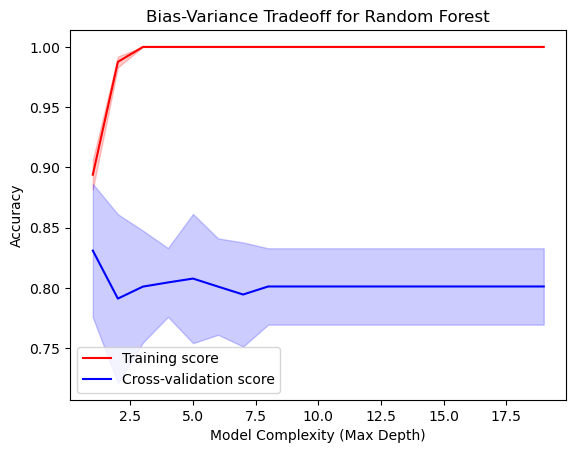

In [140]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

param_range = range(1, 20)

train_scores, test_scores = validation_curve(
    XGBClassifier(), X, y, param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy")

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.plot(param_range, train_mean, label="training score", color="r")
plt.plot(param_range, test_mean, label="cross-validation score", color="b")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="b", alpha=0.2)

plt.title("bias-variance Tradeoff for XGBClassifier")
plt.xlabel("model complexity ")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.show()

# Q3

TASK 3:
● Use the Same dataset as in Task 1
● Extract Only two Attributes with independent variable to analyze your results (restEcg
and Chol)
● Now train a Voting Classifier using (Random Forest and Adaboost)
● Plot the training and testing accuracy of individual Random Forest and XGBoost +
Accuracy graph of Voting Ensemble Technique as well.

In [141]:
df2 = pd.read_csv("heart.csv")

In [142]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [143]:
df2 = df2.drop_duplicates()

In [145]:
df2.shape

(302, 14)

In [146]:
X2= df2.loc[:, ['restecg', 'chol']]
y2 = df2['target']

In [147]:
X_train,X_test ,y_train, y_test = train_test_split(X2,y2,test_size=0.2)

In [165]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
tree = DecisionTreeClassifier(max_depth=3)
model2 = AdaBoostClassifier(estimator=tree, n_estimators=100)

In [166]:
estimator = [('rf',model1),('ada',model2)]

In [167]:
whole_model = VotingClassifier(estimators=estimator, voting='hard')

In [168]:
whole_model.fit(X_train,y_train)

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('ada',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                                 n_estimators=100))])

In [181]:
acc3 = whole_model.score(X_test,y_test)
acc3

0.5245901639344263

In [176]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [177]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

In [178]:
acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)

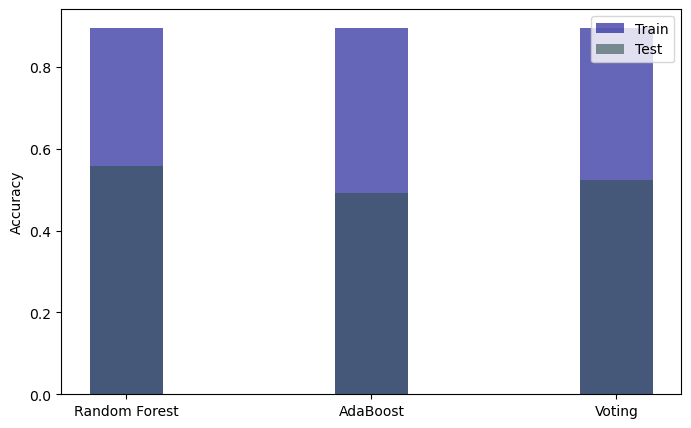

In [196]:
train_acc1 = accuracy_score(y_train, model1.predict(X_train))
train_acc2 = accuracy_score(y_train, model2.predict(X_train))
train_voting_acc = accuracy_score(y_train, whole_model.predict(X_train))

# Plot
classifiers = ['Random Forest', 'AdaBoost', 'Voting']
train_accuracies = [train_acc1, train_acc2, train_voting_acc]
test_accuracies = [acc1, acc2, acc3]

plt.figure(figsize=(8, 5))
plt.bar(classifiers, train_accuracies, color='darkblue', alpha=0.6, label='Train',width = 0.3)
plt.bar(classifiers, test_accuracies, color='darkslategray', alpha=0.6, label='Test',width = 0.3)
plt.ylabel('Accuracy')
plt.legend()
plt.show()